## Projeto 5

### Entrega Final

As variável-resposta escolhida é o IDH (Índice de Desenvolvimento Humano).
A variável-explicativa "emissões de CO2 per capta" foi escolhida por apresentar relação com o desenvolvimento econômico de um país – países mais desenvolvidos tendem a ter uma indústria mais produtiva e, portanto a emitir mais CO2.
A variável-explicativa "Idade das mulheres no primeiro casamento" foi escolhida pelo fato de países mais desenvolvidos apresentarem mais
igualdade de gênero, o que significa que as mulheres estão mais inseridas no mercado de trabalho e, portanto, tendem a se casar mais tarde.

Entrega 2

## Ana Capriles

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

In [17]:
#leitura dos dataframes
v1 = pd.read_excel("m-age.xlsx", index_col=0)
v2 = pd.read_excel("CO2.xlsx", index_col=0)
v3 = pd.read_excel("HDI.xlsx", index_col=0)

In [18]:
# restrição dos dataframes ao ano de 2005. este ano foi escolhido pois é o único ano constante da base de dados que diz respeito 
# à idade das mulheres en seu primeiro casamento
v1 = v1.A2005
v2 = v2.A2005
v3 = v3.A2005

In [19]:
result = pd.concat([v1, v2, v3], axis = 1, join="inner")

In [29]:
result.columns = ['MarriageAge', 'CO2', 'HDI']

In [30]:
result = result.dropna()

In [31]:
result

,MarriageAge,CO2,HDI
Afghanistan,17.839683,0.036780,0.340
Albania,23.326509,1.353789,0.721
Algeria,29.600000,3.257010,0.667
Argentina,23.263962,4.160611,0.765
Armenia,22.986034,1.421961,0.689
Australia,28.931255,17.773976,0.918
Austria,28.937569,9.017238,0.860
Bahamas,27.192772,5.005876,0.766
Bahrain,25.904604,26.498088,0.795
Bangladesh,18.669998,0.267095,0.462


[]

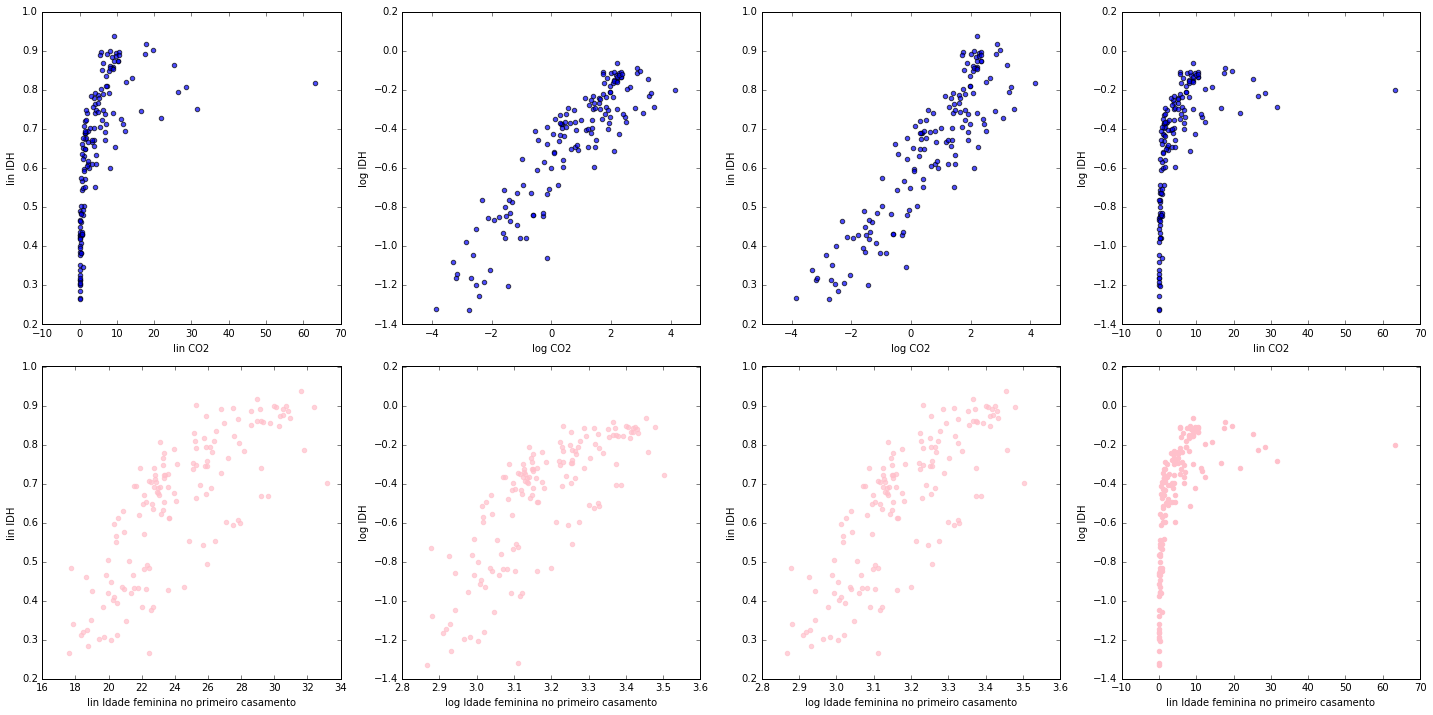

In [64]:
plt.figure(figsize=(20,10))

plt.subplot(241)
plt.scatter(result.CO2, result.HDI, alpha=0.7)  # Plot the raw data
plt.xlabel("lin CO2")
plt.ylabel("lin IDH")

plt.subplot(242)
plt.scatter(np.log(result.CO2), np.log(result.HDI), alpha=0.7)  # Plot the raw data
plt.xlabel("log CO2")
plt.ylabel("log IDH")

plt.subplot(243)
plt.scatter(np.log(result.CO2), result.HDI, alpha=0.7)  # Plot the raw data
plt.xlabel("log CO2")
plt.ylabel("lin IDH")

plt.subplot(244)
plt.scatter(result.CO2, np.log(result.HDI), alpha=0.7)  # Plot the raw data
plt.xlabel("lin CO2")
plt.ylabel("log IDH")

plt.subplot(245)
plt.scatter(result.MarriageAge, result.HDI, alpha=0.7, color="pink")  # Plot the raw data
plt.xlabel("lin Idade feminina no primeiro casamento")
plt.ylabel("lin IDH")

plt.subplot(246)
plt.scatter(np.log(result.MarriageAge), np.log(result.HDI), alpha=0.7, color="pink")  # Plot the raw data
plt.xlabel("log Idade feminina no primeiro casamento")
plt.ylabel("log IDH")

plt.subplot(247)
plt.scatter(np.log(result.MarriageAge), result.HDI, alpha=0.7, color="pink")  # Plot the raw data
plt.xlabel("log Idade feminina no primeiro casamento")
plt.ylabel("lin IDH")

plt.subplot(248)
plt.scatter(result.CO2, np.log(result.HDI), alpha=1, color="pink")  # Plot the raw data
plt.xlabel("lin Idade feminina no primeiro casamento")
plt.ylabel("log IDH")

plt.tight_layout()
plt.plot()

## Visualmente, percebe-se que apresentam mais correlação as variáveis explicativas logarítmica e a variável-resposta linear. Assim, a Idade feminina no primeiro casamento e a emissão de CO2 per capta serão tratadas logarítmicamente e o IDH será tratado de forma linear.

In [68]:
result["logCO2"] = np.log(result.CO2)
result["logMarriageAge"] = np.log(result.MarriageAge)

In [67]:
result.corr(method='pearson')

,MarriageAge,CO2,HDI,logCO2,logMarriageAge
MarriageAge,1.000000,0.391822,0.777889,0.696990,0.996665
CO2,0.391822,1.000000,0.538787,0.690417,0.403223
HDI,0.777889,0.538787,1.000000,0.899773,0.793057
logCO2,0.696990,0.690417,0.899773,1.000000,0.720271
logMarriageAge,0.996665,0.403223,0.793057,0.720271,1.000000


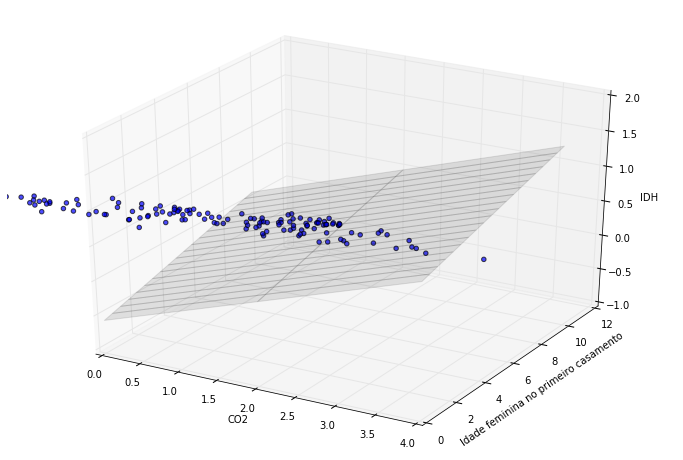

In [70]:
model = sm.ols(formula='HDI ~ logMarriageAge + logCO2', data = result)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 5, 2)                # generate a mesh
y_surf = np.arange(0, 10, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'logMarriageAge': x_surf.ravel(), 'logCO2': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(result['logCO2'], result['logMarriageAge'], result['HDI'],
           c='blue',
           marker='o',
           alpha=0.7)

ax.set_xlim(0,4)
ax.set_ylim(0,12)
ax.set_xlabel('CO2')
ax.set_ylabel('Idade feminina no primeiro casamento')
ax.set_zlabel('IDH')

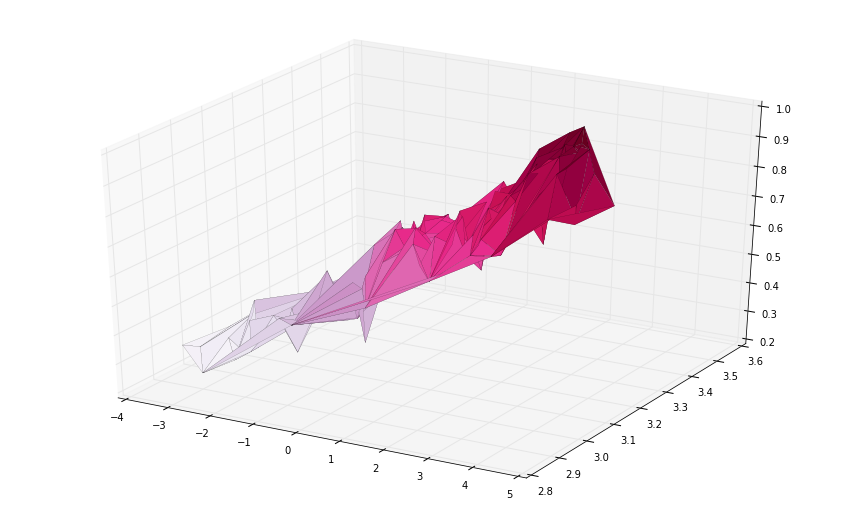

In [75]:
# Constantes:
# n_angles - numero de ângulos.
# n_radii(numero de raios)
n_angles = 10
n_radii = 1

# linspace() - Cria um vetor de raios.
# o vetor vai de 0.125 até 1.0 e é dividido por **n_radii** (numero de raios).
radii = np.linspace(0.125, 1.0, n_radii)

# Criando os ângulos.
# O intervalo vai de 0 a 2 e é multiplicado por pi.
# endpoint=True - Significa que o numero final do intervalo entra no calculo.
angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=True)

# Criando a malha
# Para cada raio repetiremos o vetor dos ângulos.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Criando uma figura.
fig = plt.figure(figsize=(15,9))

# Indicando que a projeção da figura será 3D.
ax = fig.gca(projection='3d')

# plot_trisurf() - Gera o gráfico (x, y, z).
# cmap - Gera a cor da malha que é exibida no gráfico.
# linewidth - Comprimento da linha, este valor vai de 0 a 1.
ax.plot_trisurf(result.logCO2, result.logMarriageAge, result.HDI, cmap='PuRd', linewidth=0.1)

# Exibe o gráfico.
plt.show()

In [76]:
#Montagem dos dados
y=result.HDI
X=result.iloc[:,(0,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.203e+30
Date:                Tue, 30 May 2017   Prob (F-statistic):               0.00
Time:                        16:57:15   Log-Likelihood:                 4973.7
No. Observations:                 148   AIC:                            -9941.
Df Residuals:                     145   BIC:                            -9932.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        -1.11e-16   3.76e-16     -0.295      0.768     -8.54e-16  6.32e-16
MarriageAge  5.204e-18   2.27e-17      0.229      0.819     -3.97e-17  5.02e-17
HDI             1.0000   4.52e-16   2.21e+15      0.000         1.000     1.000
==============================================================================
Omnibus:                       16.828   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.481
Skew:                           0.327   Prob(JB):                       0.0237
Kurtosis:                       2.114   Cond. No.                         237.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Teste de White
#y estimados
y_hat = fit.predict(X)

#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2,X)

(136.06166107334545,
 1.2289894674034301e-27,
 323.67578087899471,
 9.6617142914756153e-76)